<a href="https://colab.research.google.com/github/anan97-ya/Customer-Spending-Analysis-for-E-Commerce-Strategy-Using-Linear-Regression/blob/main/Ecomm_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananya1654656","key":"305f5bd030edfc187ef6eba4884991ee"}'}

# MOUNTING DATA

In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d srolka/ecommerce-customers


Dataset URL: https://www.kaggle.com/datasets/srolka/ecommerce-customers
License(s): unknown
  0% 0.00/43.1k [00:00<?, ?B/s]
100% 43.1k/43.1k [00:00<00:00, 1.80MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("ecommerce-customers.zip", "r") as zip_ref:
    zip_ref.extractall("ecommerce_data")


In [ ]:
import os
os.listdir("ecommerce_data")


['Ecommerce Customers.csv']

In [ ]:
import pandas as pd
customers = pd.read_csv("ecommerce_data/Ecommerce Customers.csv")
# df.head()
customers.info()

customers.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [ ]:
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# FINDING CORRELATION

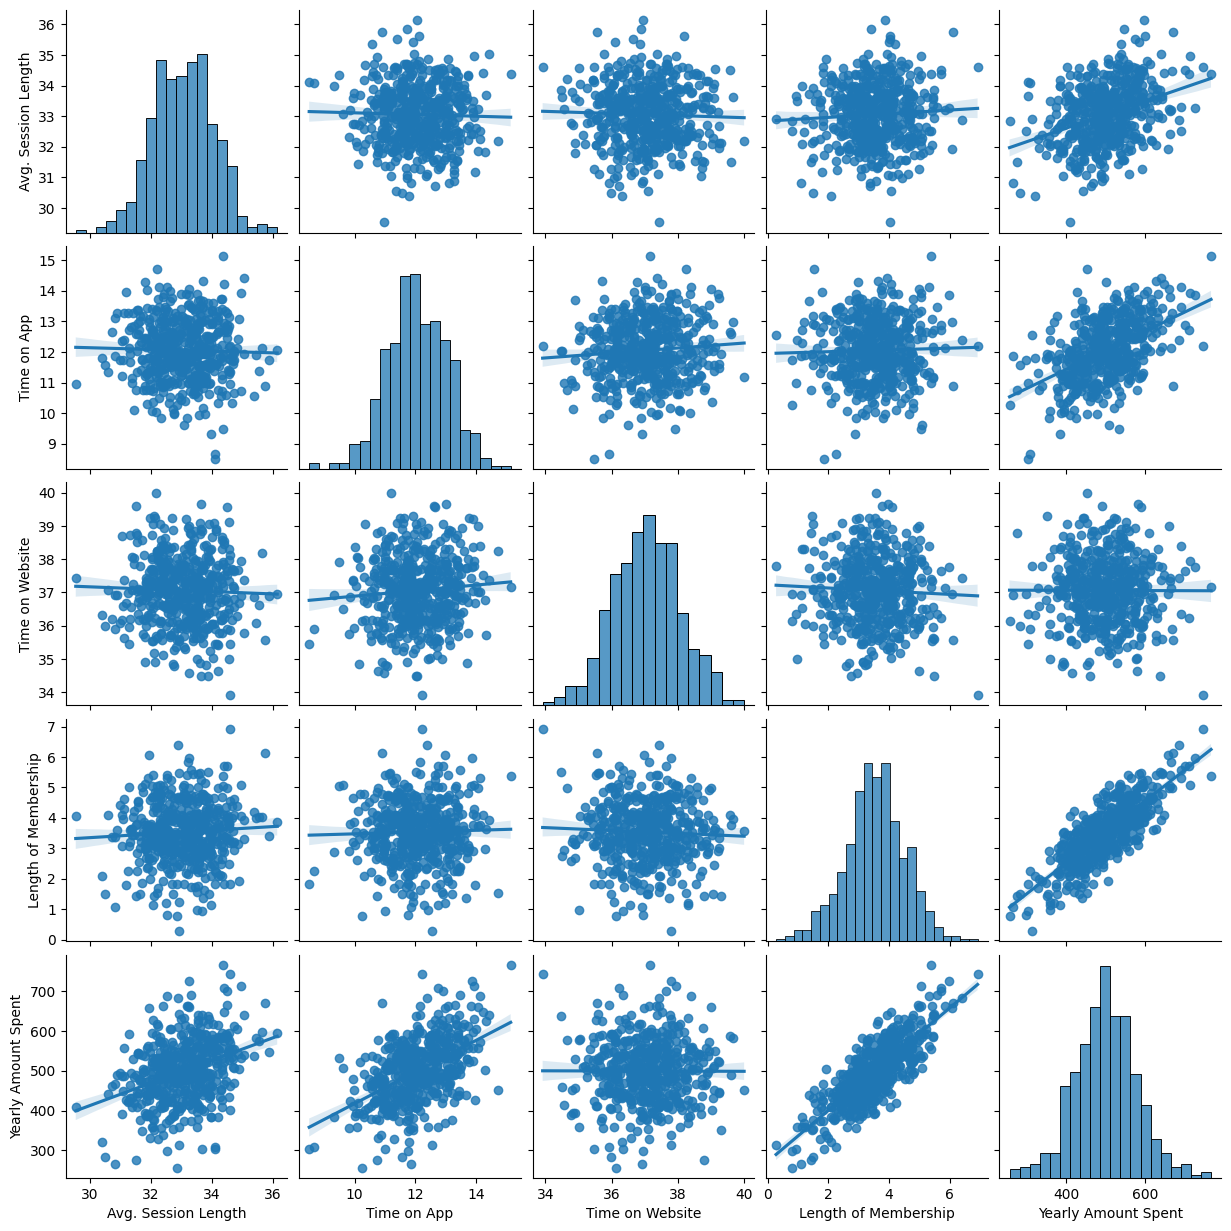

In [ ]:
import seaborn as sns
# sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind="scatter")
sns.pairplot(customers , kind='reg')



** observed linear plots : **

✅ yearly amount spent VS avg session length
✅ yearly amount spent VS time on app
✅ yearly amount spent VS length of membership



In [ ]:
customers[['Length of Membership', 'Yearly Amount Spent']].corr()

# the most correlated variables are length of membership and yearly amount spent

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


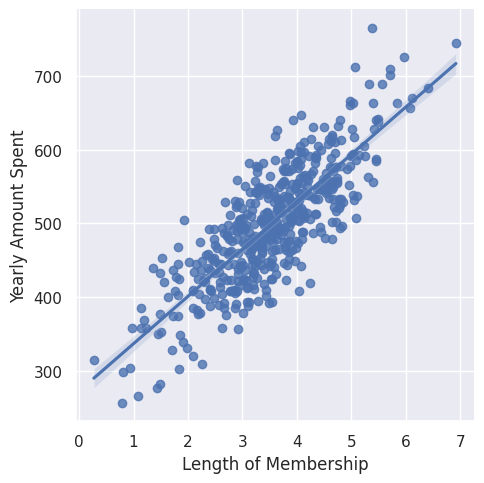

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

# TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (independent variables) and y (dependent variable)
X = customers[['Length of Membership', 'Time on App', 'Time on Website', 'Avg. Session Length']]
y = customers['Yearly Amount Spent']

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



                      Coefficient
Length of Membership    61.279097
Time on App             38.590159
Time on Website          0.190405
Avg. Session Length     25.981550


# PREDICTING AND TESTING

In [ ]:
predictions = model.predict(X_test)


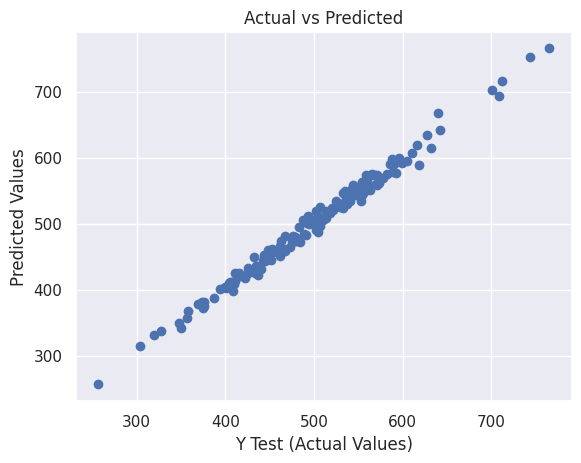

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)  # Scatter plot of actual vs predicted values
plt.xlabel('Y Test (Actual Values)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


# EVALUATING MODEL

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


R² Score: 0.9890
Mean Absolute Error (MAE): 7.2281
Mean Squared Error (MSE): 79.8131
Root Mean Squared Error (RMSE): 8.9338


Interpreting the Results:

✅ R² Score (0.9890)-The model explains 98.9% of the variance, meaning it's highly accurate.
✅ MAE (7.23) -On average, predictions are off by about $7.23.
✅ MSE (79.81) -Squared error measure (not directly interpretable).
✅ RMSE (8.93) -On average, the predictions deviate by around $8.93 from actual values.

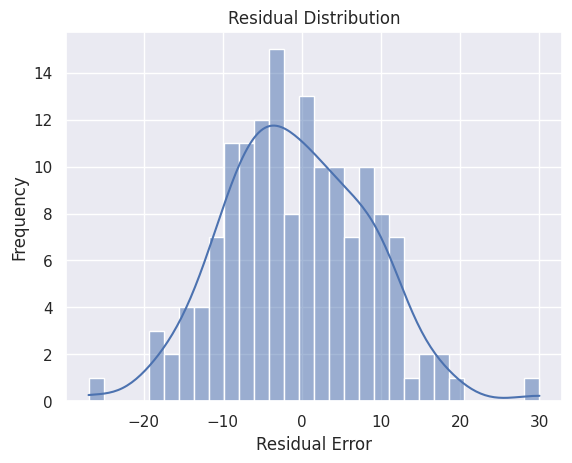

In [ ]:
import seaborn as sns
sns.histplot(y_test - predictions, bins=30, kde=True)
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


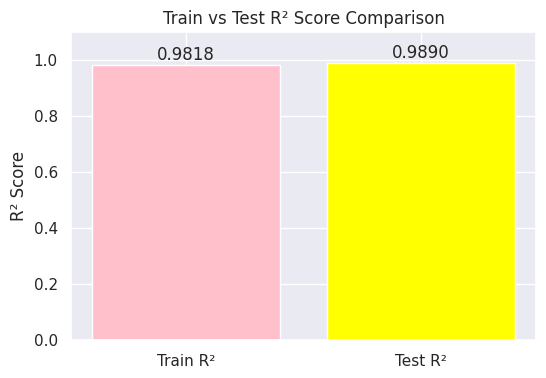

In [ ]:
import matplotlib.pyplot as plt

# Get R² scores for train and test sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

# Bar chart to compare R² scores
plt.figure(figsize=(6, 4))
plt.bar(['Train R²', 'Test R²'], [train_r2, test_r2], color=['pink', 'yellow'])
plt.ylim(0, 1.1)  # Keep scale between 0 and 1.1
plt.ylabel('R² Score')
plt.title('Train vs Test R² Score Comparison')

# Display values on top of bars
for i, score in enumerate([train_r2, test_r2]):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)

plt.show()
